Read successfully
Delete successfully!


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-4.578296,6.015039,2.888273,4.120092,-3.966346,2.796887,0.961378,2.371317,-1.680671,0.126735,-0.035315,-1.272893,-0.854674,1.639530,0.117313,0.780313,0.149774,0.318837,0.014806,0.560480
1,5.989876,3.595808,-1.588458,1.636114,0.315786,-0.399643,2.971125,-2.810396,-1.907564,0.882461,-0.861858,-0.689354,-0.001995,-1.616437,-0.052444,-0.044919,-0.648015,1.639775,-1.108125,2.860480
2,-5.425852,3.337552,0.954733,3.517683,-0.825565,1.803135,0.909487,0.504520,0.954718,-2.052355,2.561531,-0.952296,-0.483821,-1.326121,1.858167,0.277848,2.457757,0.916613,-1.273508,-0.900242
3,1.328869,0.842549,-1.545550,-1.709565,-1.029313,0.434443,1.378256,-2.082721,-0.123612,-1.299533,-0.686162,-1.590991,-2.298526,0.264249,1.014087,1.299285,1.028712,-0.385259,1.032632,0.517692
4,-3.211046,5.656221,2.807157,4.479221,-4.188016,3.218008,1.475836,1.631903,-2.289419,0.925332,0.428401,-0.869684,-2.201321,1.522374,-0.820148,0.053161,0.180097,0.613142,0.174579,-0.216080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,-2.509370,1.583921,0.369693,-2.347701,-0.675391,0.798258,-0.390672,-2.316481,-1.330385,-0.098509,-0.462203,0.621895,0.351783,-1.226626,0.673560,0.641372,0.756762,0.386867,0.973972,-0.374104
1514,-2.034780,-4.876701,-0.685473,-1.245362,0.523088,0.136203,-0.592660,0.885570,-0.171880,1.702827,0.326637,0.009633,1.385246,0.561616,0.242209,0.359885,-0.131116,0.023694,-0.542438,0.925921
1515,-4.111527,-0.278622,0.416986,-0.866492,-0.013824,1.557967,1.674162,-1.008903,3.057886,2.286010,3.483448,1.275101,1.282952,1.043791,1.714810,1.105332,-1.832635,-2.471708,0.335175,0.086127
1516,-3.040252,-2.707143,0.280174,-1.264405,-0.050894,0.305820,0.452648,0.981802,0.618735,0.097592,-0.271672,-0.356610,1.972901,-0.147198,0.323833,0.372318,-0.455144,-0.539875,-0.253739,0.447988


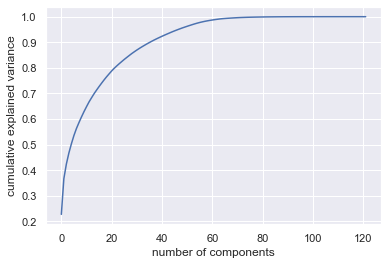

In [7]:
import pandas as pd
import numpy as np

# Read the data and check the first 5 rows
# Check if the file is imported successfully
try:
    data_df = pd.read_csv("IPEDS_data.csv")    
except IOError:
    print('Error: No such file or loading failed') 
else:
    print( 'Read successfully')

# Drop the University name column since the ID columns can identify the University
# Check if the column name is existing
try:
    data_df.drop('Name',axis=1,inplace=True)
except Exception:
    print('Error: The column is not exist!')
else:
    print('Delete successfully!')

# Delete rows with a value missing rate greater than 40%. 
# Due to too much data loss, it may cause a large error in the analysis results
# First, count the number of the missing value in each row
missing_count=data_df.isnull().sum(axis=1) 
col_count=data_df.shape[1]
# Second,calculate the missing rate of each row of data
missing_ratio=missing_count/col_count 
# Third, add a missing rate column to the dataframe
data_df['missing ratio']=missing_ratio
# At last, drop rows where the missing rate is greater than 40%. 
data_df.drop(data_df[data_df['missing ratio']>0.4].index,inplace=True)

# Transform human language into machine language to facilitate subsequent data processing
# First, check the number of nulls in each column
data_df.isnull().sum()
# Second, convert every 'yes' and 'no' into 1 and 0, respectively
data_df.replace({'No','Yes'},{0,1},inplace=True)

# Take all column names and convert them to list form, prepare for adding column names later
data_df.columns
columns_name=data_df.columns.tolist()

# Use KNN algorithm to fill the missing values
# KNN algorithm fills missing values by analyzing the similarity between rows
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
# n_neighbors 5 just because it is the default value
# It finds the nearest k neighbors based on the value of neighbor and assign an appropriate value to the missing value
imputer = KNNImputer(n_neighbors=5, weights="uniform")
data_df_list = imputer.fit_transform(data_df) 
data_df = pd.DataFrame(data_df_list)

# The column name of the dataframe is dropped since it fills in the missing values in the array type
# Add column names for the dataframe
# The extraction of column names has mentioned before
data_df.columns = columns_name

# Data standardization is to transform each data to have a mean of 0 and a standard deviation of 1.
# For example, in the IPDES data, the values in score columns are much larger than those values in percentage columns
# Thus, use data standarization to reduce the errors in the subsequent data processing results
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = data_df.iloc[:,2:]
x = scaler.fit_transform(x)
y = data_df.iloc[:,0]

# The IPDES data has too many dimensions, which makes the analysis process difficult.
# Therefore, principal component analysis is used to reduce data dimension
# Reduce the dimension of the data set, while maintaining the features of the data set that contribute the most to the variance
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

# As can be seen, the first 20 components take up 80% variance
# Thus, reduce the data dimensions to 20 and get a new dataframe for further data analysis
pca = PCA(n_components=20)  
pca.fit(x)                  
new_x=pca.fit_transform(x)   
newdata_df=pd.DataFrame(new_x)
newdata_df
